In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import preprocess

In [170]:
eos_data = pd.read_parquet('tEOSUSD_trades.parquet')
btc_data = pd.read_parquet('tBTCUSD_trades.parquet')
eth_data = pd.read_parquet('tETHUSD_trades.parquet')

In [171]:
eos_df= preprocess.featurize('tEOSUSD_trades.parquet')
btc_df= preprocess.featurize('tBTCUSD_trades.parquet')
eth_df= preprocess.featurize('tETHUSD_trades.parquet')
btc_df.head()

,ID,MTS,AMOUNT,PRICE,date,SMA5,SMA10,SMA25,SMA50,SMA100,ewm_com05,ewm_com1,fast_fourier
0,264656520,1530605045829,0.023000,6643.3,2018-07-03 10:04:05.829,NaN,NaN,NaN,NaN,NaN,6643.300000,6643.300000,(25990869.778626326+0j)
1,264656363,1530605006684,-0.030972,6643.2,2018-07-03 10:03:26.684,NaN,NaN,NaN,NaN,NaN,6643.225000,6643.233333,(8670.964125569666-11561.291779238984j)
2,264656355,1530605004209,0.093837,6643.3,2018-07-03 10:03:24.209,NaN,NaN,NaN,NaN,NaN,6643.276923,6643.271429,(-5313.63149732724+2678.5772292422525j)
3,264656354,1530605004206,0.150000,6643.3,2018-07-03 10:03:24.206,NaN,NaN,NaN,NaN,NaN,6643.292500,6643.286667,(-4141.057088608808-6321.259002440313j)
4,264656353,1530605004204,1.756163,6643.3,2018-07-03 10:03:24.204,6643.28,NaN,NaN,NaN,NaN,6643.297521,6643.293548,(-3233.615911609748-4321.5205592908505j)


ValueError: x and y must have same first dimension, but have shapes (3004,) and (1763,)

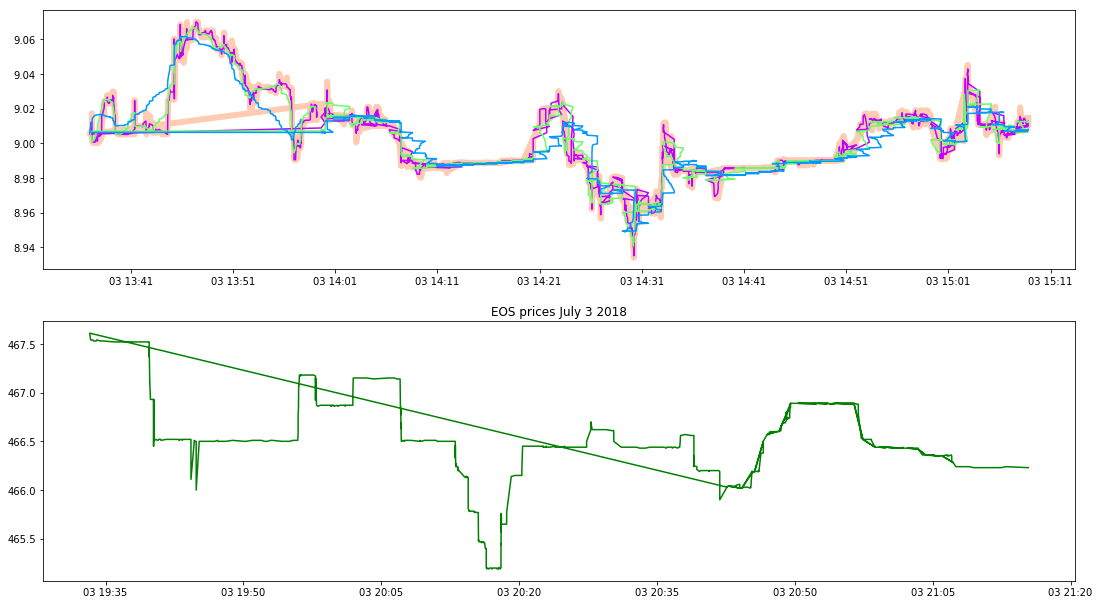

In [183]:
fig, ax = plt.subplots(2)
fig.set_size_inches(18.5, 10.5)

plt.title('EOS prices July 3 2018');

t = eos_df['date']
s = eos_df['PRICE']
s1 = eos_df['SMA5']
s2 = eos_df['SMA25']
s3 = eos_df['SMA100']
ax[0].plot(t,s,alpha=0.5,lw=6,c='#ff9966')
ax[0].plot(t,s1,lw=1.5,c='#bf00ff' )
ax[0].plot(t,s2,lw=1.5, c='#66ff66')
ax[0].plot(t,s3,lw=1.5, c='#0099ff')


t2 = eth_df['date']
s5 = eth_df['PRICE']
s6 = eth_df['SMA5']
s7 = eth_df['SMA25']
s8 = eth_df['SMA100']
ax[1].plot(t2,s5,'g-')
ax[1].plot(t,s6,'r.')
ax[1].plot(t,s7,'y.')
ax[1].plot(t,s8,'b.')

In [160]:
# t = eos_df['date']
# s1 = eos_df['PRICE']
# ax1.plot(t, s1, 'b-')
# ax1.set_xlabel('time (s)')
# ax1.set_ylabel('eos price', color='b')
# ax1.tick_params('y', colors='b')

# ax2 = ax1.twinx()
# s2 = btc_df['PRICE']
# ax2.plot(t, s2, 'r.')
# ax2.set_ylabel('btc price', color='r')
# ax2.tick_params('y', colors='r')

In [163]:
#plot frequency of sales per datetime? difficult to compare such disparate scales....

In [196]:
import plotly 
plotly.tools.set_credentials_file(username='bbellabotti', api_key='3r1OiWIXgYdlZBJ6kLhD')
import plotly.plotly as py
import plotly.graph_objs as go

In [201]:
trace0 = go.Scatter(
    x= eth_df['date'],
    y= eth_df['PRICE']
)
trace1 = go.Scatter(
    x= eth_df['date'],
    y= eth_df['SMA100']
)
data = [trace0, trace1]

py.iplot(data, filename = 'basic-line')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~bbellabotti/0 or inside your plot.ly account where it is named 'basic-line'
